# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tasks
we will be working on a classic CNN task of classifying cats and dogs images. You can access the training and testing sets [here](https://drive.google.com/drive/folders/19EL9VyYCVqxStG-O1jJtBQGa8JZpLDvO?usp=sharing) and get acquainted with the folder structure.

Make sure to change your Colab runtime to GPU to ensure adequate performance.

Specify 4 directories for cats and dogs images of training and testing sets respectively. You will be using them to build and train the network.

In [2]:
# your code:
test_dir="/content/drive/My Drive/Colab Notebooks/WCS/CNN Quest/test_set"
train_dir="/content/drive/My Drive/Colab Notebooks/WCS/CNN Quest/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#load an image from the file
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from matplotlib import pyplot
test_image = image.load_img(test_dir + '/cats/cat.4003.jpg', target_size = (224, 224))

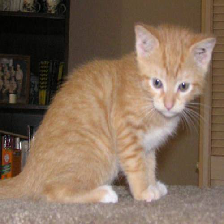

In [9]:
test_image

In [10]:
x=img_to_array(test_image)
x.shape


(224, 224, 3)

The ImageDataGenerator is an easy way to load and augment images in batches for image classification tasks.
Initiate `ImageDataGenerator` (check the [documentation](https://keras.io/api/preprocessing/image/)). Your image generator needs to convert the image from RGB into number arrays in order for the neural network to proces them (in other words, normalize the values using the `rescale` parameter).

In [5]:
# your code:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

Apply the `ImageDataGenerator` you defined above using `flow_from_directory` to convert both training and testing data.
The data generator itself is in fact an iterator, returning batches of image samples when requested. We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function. https://keras.io/api/preprocessing/image/

In [6]:
# your code:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir, target_size = (224, 224), batch_size = 32)
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (224, 224), batch_size = 32)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


The images in the dataset are not used directly. Instead, only augmented images are provided to the model. Because the augmentations are performed randomly, this allows both modified images and close ones of the original images (e.g. almost no augmentation) to be generated and used during training.

you can generate an infinite number from one image. This is normal in fact, consider just the number of images you can generate by rotation from the intial, it is infinite, because for each value of rotation angle you can generate a different image. 

Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.


In [11]:
# your code:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Load the VGG16 Pre-trained Model

Look into the Keras Documentation for pretrained models: https://keras.io/api/applications/.
The VGG16 model was developed by the Visual Graphics Group (VGG) at Oxford and was described in the 2014 paper titled “Very Deep Convolutional Networks for Large-Scale Image Recognition.”

By default, the model expects color input images to be rescaled to the size of 224×224 squares.
https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

In [ ]:
# example of loading the vgg16 model from keras
from keras.applications.vgg16 import VGG16

In [44]:
#you may wish to use the vgg model architecture on your dataset
#but not use the pre-trained weights,  initialize the model with random weights 
#and train the model from scratch.
#This can be achieved by setting the ‘weights‘ argument to None instead of the default ‘imagenet‘.
model = VGG16(weights=None, classes=2)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Compile it using the optimizer and error metrics of your choice.

In [50]:
model = VGG16(classes = 2)
model.summary()

ValueError: ignored

In [48]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [47]:
(model.layers[-4].output)

<KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block5_conv1')>

# Pre-Trained Model as Feature Extractor in Model
We can use some or all of the layers in a pre-trained model as a feature extraction component of a new model directly.

This can be achieved by loading the model, then simply adding new layers. This may involve adding new convolutional and pooling layers to expand upon the feature extraction capabilities of the model or adding new fully connected classifier type layers to learn how to interpret the extracted features on a new dataset, or some combination.

For example, we can load the VGG16 models without the classifier part of the model by specifying the “include_top” argument to “False”, and specify the preferred shape of the images in our new dataset

In [39]:

# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model3 = VGG16(include_top=False, input_shape=(224, 224, 3))
# add new classifier layers
cnn = Conv2D(filters=10, kernel_size=(3,3), padding="same", activation="relu")(model3.layers[-3].output)
flat1 = Flatten()(cnn)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)
# define new model
model3 = Model(inputs=model3.inputs, outputs=output)
# summarize
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [40]:
# your code:
import tensorflow as tf
#from tf.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(lr=0.001)
model3.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fit the model using `fit_generator`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

Finally we can make use of the data generator. Instead of calling the fit() function on our model, we must call the fit_generator() function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

The steps_per_epoch parameter is the number of batches of samples it will take to complete one full epoch. steps_per_epoch should be equivalent to the total number of samples divided by the batch size. 
The reason why you have to set steps_per_epoch is that the generator is designed to run indefinitely (See the docs:https://keras.io/api/models/model/#fit_generator)

In [41]:
steps_per_epoch = 8000/32

In [51]:
# your code:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model3.fit_generator(steps_per_epoch=steps_per_epoch,generator=training_data, validation_data= testing_data, validation_steps=1,epochs=2,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/2
250/250 [==============================] - 1413s 6s/step - loss: 0.6933 - accuracy: 0.5002 - val_loss: 0.6937 - val_accuracy: 0.4062
Epoch 2/2
250/250 [==============================] - 205s 817ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6934 - val_accuracy: 0.4688


Plot the model accuracy.

In [ ]:
# your code:
accuracy = fitted_model.history['acc']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [ ]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

Using the full Pretrained VGG16 model with include Top = True

In [ ]:
#load an image from the file
test_image = image.load_img(test_dir + '/cats/cat.4003.jpg', target_size = (224, 224))

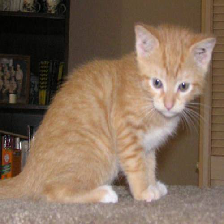

In [ ]:
test_image

In [ ]:
image = img_to_array(test_image)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
image = preprocess_input(image)

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# convert the image pixels to a numpy array
image = img_to_array(test_image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (60.90%)


# Example of ImageDataGenerator Horizontal shift 

In [ ]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# convert to numpy array
data = img_to_array(test_image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()